### Анализ оттока клиентов банка "Метанпром"

#### Описание:

**Заказчик**: Маркетинговый отдел банка.

**Цель**: Минимизировать отток клиентов банка воздействуя на целевой сегмент.

**Задачи**:
- Провести исследовательский анализ данных, определить все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравнить портреты типичных клиентов, которые склонны и не склонны уходить из банка);
- Сформулировать и проверить статистические гипотезы;
- Объединяя признаки отточности, сформировать сегменты, отобрать из них лучшие и дать по ним рекомендации.

Для анализа Заказчиком был предоставлен датафрейм с данными о пользователях `/datasets/bank_scrooge.csv`. Банк располагается в Ярославле и обласных городах: Ростов Великий и Рыбинск. О данных ничего неизвестно, по этому необходимо в первую очередь ознакомиться с фреймом, выполнить предобработку данных для дальнейшего корректного анализа, который будет выполнен в несколько этапов:

**1.Изучение общей информации:**
- Изучение размера датафрейма: количество столбцов, строк, стиль вывода
- Изучение типа данных
- Проверка на пропуски 
- Проверка на явные дубликаты

**2.Предобработка данных:**
- Преобразование данных
- Проверка на уникальные значения
- Изучение дубликатов в столбце `user_id`
- Изучение пропусков в столбце `balance`
- Кодирование категориальных данных

**3.Исследовательский анализ:**
 - Изучение аномалий и выбросов
 - Группировка клиентов по признаку отточности
 - Изучить расспределения и визуализировать их для обеих групп по разным критериям: пол, возраст, доход и т.д., найти признаки отточности
 - Построить графики корреляции для обеих групп и найти зависимости одних данных от других
 
**4.Проверка гипотез:**
 - Проверка статической гипотезы о различии дохода между теми клиентами, которые ушли и которые остались
 - Проверка статической гипотезы о различии дохода между теми клиентами, у которых один продукт и у которых более одного продукта
 - Проверка статической гипотезы о различии дохода между теми клиентами, которые живут в большом городе и которые живут в маленьком городе
 
**5.Сегментизация клиентов:**
 - На основании полученных результатов исследовательского анализа выделить сегменты отточных клиентов
  
**6.Выводы и рекомендации:**
 - Объедияем признаки отточности и даем для них рекомендации 
 

#### Материалы: 

Ссылка на презентацию: <https://disk.yandex.ru/i/WQrXrDpDcOcSQQ>

### Шаг №1: Изучение общей информации

In [1]:
#импортируем все необходимые библеотеки для анализа
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#игнорируем ошибки
import warnings
warnings.filterwarnings('ignore')

#выводим столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

#выводим значения без сокращений
pd.set_option('display.max_colwidth', None)

In [2]:
#загрузим датафрейм и сохраним его в переменну
try:
    df = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
#создадим функцию для ознакомления с датафреймом

def pre_processing(data):
    
    #выведем первые и последние пять строк фрейма
    head_info = display(data.head())
    tail_info = display(data.tail())
    print('-'*50)
    
    #выведем общую информацию о фрейме
    inform = data.info()
    print('-'*50)
    
    #проверим наличие явных дубликатов
    dub_count = data.duplicated().sum()
    print('Количество дубликатов равно', dub_count)

In [4]:
#изучим визуально фрейм вызвав функцию pre_processing
pre_processing(df)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9995,120553,814.00,Рыбинск,М,27.00,1,"78,144.65",1,0,1,"18,943.64",0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,"196,898.29",0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,"108,905.09",0
9998,148700,777.00,Ярославль,Ж,68.00,3,"865,457.97",3,0,1,"86,874.90",0
9999,96267,828.00,Рыбинск,Ж,58.00,3,"1,180,886.70",4,0,1,"21,422.37",0


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
--------------------------------------------------
Количество дубликатов равно 0


_**Промежуточный вывод:** При первом ознакомлении с датафреймом, мы видим, что нам предоставленны данные о 10 000 пользователях. Столбцов 12, как было заявлено в ТЗ, наименование необходимо привести к "змеиному типу"._ 

_В столбце `age` есть пропуски - менее 1% от общего объема датафрейма, т.к.замена пропусков в данном столбце будет не корректна - мы можем их удалить, результаты анализа при этом не будут искажены; также в столбце `balance` есть пропуски, которые составляют - 23%, которые необходимо изучить более детально. Информация о пропусках передана Заказчику, скорее всего это нулевой баланс, проверим это на следующем этапе._

_Все столбцы имеют корректный тип данных, кроме столбца `age`, его приведём к типу `integer`_

### Шаг №2: Предобработка данных

#### Преобразование данных

In [5]:
#приведем данные к змеиному типу и выведем все наименования столбцов
df = df.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'})
print(df.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')


In [6]:
#удалим строки, где есть пропуски в столбце age и перезапишем датафрейм
df1 = df.query('age > 0')

print(f'Осталось количество строк во фрейме: {len(df1)}')
print(f'Общая потеря данных: {round((1 - len(df1)/10000) *100, 2)} %')

Осталось количество строк во фрейме: 9974
Общая потеря данных: 0.26 %


In [7]:
#приведем столбец age к типу integer

df1['age'] = df1['age'].astype('int')

#### Проверка на уникальные значения

In [8]:
#напишем функцию, которая выведет уникальные значения для всех столбцов

def col_unique(data):
    ''' На вход передаем текущий фрейм и создаем стобец в который попадут уникальные значения
    и  их количество. Переворачиваем таблицу для удобства чтения и сортируем в порядке возрастания'''
    
    df1 = data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df1[col].unique(), df1[col].nunique()]
    
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0:'Уникальные значения', 1:'Кол-во уникальных значений'}, axis=1)


In [9]:
col_unique(df1)

,Уникальные значения,Кол-во уникальных значений
gender,"[Ж, М]",2
credit_card,"[0, 1]",2
last_activity,"[1, 0]",2
churn,"[1, 0]",2
city,"[Рыбинск, Ярославль, Ростов]",3
products,"[2, 3, 1, 4, 5, 0]",6
equity,"[1, 5, 0, 4, 3, 2, 6, 7, 8, 9]",10
age,"[25, 37, 30, 51, 34, 56, 39, 38, 54, 67, 52, 41, 31, 28, 35, 42, 45, 53, 40, 43, 47, 48, 61, 62, 36, 26, 27, 60, 72, 50, 46, 55, 58, 71, 44, 49, 33, 32, 66, 29, 68, 73, 69, 59, 21, 65, 57, 63, 80, 24, 70, 77, 64, 23, 20, 18, 19, 78, 74, 76, 22, 75, 83, 82, 81, 84, 79, 86]",68
score,"[850.0, 861.0, 892.0, 866.0, 730.0, 856.0, 807.0, 825.0, 923.0, 906.0, 927.0, 921.0, 845.0, 837.0, 815.0, 731.0, 829.0, 793.0, 876.0, 922.0, 772.0, 896.0, 871.0, 732.0, 898.0, 806.0, 766.0, 776.0, 868.0, 946.0, 828.0, 786.0, 944.0, 863.0, 822.0, 794.0, 924.0, 811.0, 814.0, 956.0, 935.0, 826.0, 849.0, 901.0, 893.0, 792.0, 888.0, 831.0, 748.0, 820.0, 860.0, 914.0, 930.0, 948.0, 789.0, 737.0, 812.0, 933.0, 809.0, 749.0, 873.0, 859.0, 950.0, 937.0, 835.0, 768.0, 767.0, 785.0, 846.0, 750.0, 816.0, 894.0, 891.0, 788.0, 758.0, 787.0, 821.0, 855.0, 779.0, 791.0, 838.0, 971.0, 797.0, 841.0, 915.0, 985.0, 870.0, 897.0, 763.0, 774.0, 686.0, 1000.0, 875.0, 819.0, 869.0, 854.0, 810.0, 761.0, 802.0, 958.0, ...]",348
balance,"[59214.82, 850594.33, nan, 1524746.26, 174.0, 863687.24, 405042.44, 458145.4, 1206337.87, 591928.52, 302249.22, 547499.87, 1480548.47, 507842.84, 627034.5, 2307947.36, 1315511.65, 708866.92, 163725.37, 561906.51, 288289.94, 364049.27, 250543.82, 49105.63, 532311.98, 377460.32, 409634.94, 448062.52, 1461423.33, 1472483.77, 207919.65, 147487.39, 129799.35, 1067536.4, 161088.68, 3781118.22, 333330.99, 366599.61, 376382.04, 655642.36, 390504.59, 409475.18, 75005.22, 182889.96, 237691.16, 865702.41, 648594.03, 657597.09, 3134788.66, 283932.13, 438549.21, 579820.46, 371454.1, 234704.58, 552231.35, 915959.85, 652553.8, 2332677.14, 253966.27, 1214707.38, 2061152.96, 256477.33, 963460.2, 962094.24, 351583.16, 1156992.03, 266586.19, 35867.0, 1303130.78, 231972.86, 786911.18, 544525.02, 313725.58, 1060651.02, 286655.3, 398611.43, 157677.78, 312743.28, 1195619.0, 1203154.28, 753022.09, 322973.24, 832697.79, 109453.53, 175505.11, 830789.38, 1262394.1, 6749773.07, 2166303.8, 421820.4, 431061.2, 780034.14, 1257139.04, 599008.38, 399260.84, 37164.84, 557547.99, 801449.41, 182051.05, 1319552.08, ...]",7691


Визуально видно, что в таблице нет аномалий и выбросов. Но в столбце `user_id` у нас должно остатся 9974 уникальных пользователей, но в таблице их всего 9924, т.е. у нас есть 50 дубликатов. Изучим их более детально.

#### Изучение дубликатов в столбце `user_id`

In [10]:
#с помощью sort_values получим количество уникальных значений в столбце user_id
#оставим только те, которые дублируются и переведем таблицу во фрейм

double = (df1['user_id']
          .value_counts()
          .to_frame()
          .query('user_id > 1')
          .reset_index()
         )

#теперь переведем в список уникальные id, которые дублируются во фрейме
double_list = double['index'].tolist()

#проверим их количество
print(f'Количество дубликатов в столбце user_id: {len(double_list)}')

Количество дубликатов в столбце user_id: 50


In [11]:
#теперь сделаем срез по данному списку и посмотрим на полные данные

double_query = (df1
                .query('user_id in @double_list')
                .sort_values(by='user_id')
               )
double_query.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.00,Рыбинск,Ж,55,1,"362,756.49",3,0,1,"175,920.48",1
7694,116540,887.00,Ярославль,Ж,38,0,NaN,1,0,1,"119,247.61",0
4866,117943,855.00,Рыбинск,Ж,32,6,"1,036,832.93",4,1,1,"107,792.71",1
7542,117943,880.00,Ярославль,Ж,40,0,NaN,1,1,0,"137,718.93",0
5863,120258,908.00,Рыбинск,Ж,38,4,"2,213,581.63",2,0,1,"160,327.77",1
5896,120258,905.00,Ярославль,М,30,0,NaN,1,1,1,"146,427.96",0
1411,123461,829.00,Ярославль,Ж,59,0,"96,222.44",2,0,1,"102,771.55",1
8638,123461,934.00,Рыбинск,М,34,0,NaN,2,1,0,"291,619.27",0
9775,124450,758.00,Рыбинск,Ж,36,0,"73,574.07",2,0,1,"79,963.59",0
8164,124450,859.00,Ярославль,Ж,38,6,"516,811.20",1,1,1,"95,144.63",1


Каждый из 50 уникальных клиентов, имеет в базе данных информацию, которая протеворечит друг другу: город, возвраст, пол и т.д. Здесь явно произошла ошибка при сборе данных.

Эти пользователи не могут быть в анализе, т.к. мы не можем получить информацию, какие данные достоверны и на каком этапе сборе данных произошла ошибка, по этому все 100 срок мы удаляем из датафрейма.

In [12]:
#создаем новый фрейм со срезом данных
df2 = df1.query('user_id not in @double_list')

print(f'Осталось количество строк во фрейме: {len(df2)}')
print(f'Общая потеря данных: {round((1 - len(df2)/10000) *100, 2)} %')

Осталось количество строк во фрейме: 9874
Общая потеря данных: 1.26 %


Мы потеряли 1.26% данных от первоначального датафрейма, что является приемлемым для дальнейшего анализа.


#### Изучение пропусков в столбце `balance`

In [13]:
#выведем таблицу только с пропусками
nulls = df2.query('balance.isna()')
nulls

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0
9,133130,906.00,Ярославль,Ж,67,0,NaN,1,0,1,"238,055.53",0
10,148929,927.00,Ростов,М,52,0,NaN,1,1,1,"196,820.07",0
11,172184,921.00,Ростов,М,41,0,NaN,1,1,1,"217,469.48",0
19,127034,922.00,Рыбинск,Ж,53,0,NaN,1,0,0,"147,094.82",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.00,Ростов,М,38,0,NaN,1,0,0,"171,763.69",0
9984,125941,729.00,Ярославль,Ж,42,0,NaN,1,1,1,"687,538.70",0
9993,219924,884.00,Рыбинск,Ж,36,0,NaN,1,1,1,"169,844.88",0
9996,139170,894.00,Ярославль,М,46,0,NaN,1,1,0,"196,898.29",0


In [14]:
#проверим расспределение отточности 
nulls.groupby('churn')['churn'].count()

churn
0    2247
1      13
Name: churn, dtype: int64

Мы видим, что не отточных клиентов с нулевым балансом намного больше, чем отточных. Значит пропуски не взаимосвязаны с признаком оттока. Посмотрим в каких городах больше всего пропусков.

In [15]:
#группируем таблицу по столбцу city
nulls.groupby('city')['city'].count()

city
Ростов        235
Рыбинск       576
Ярославль    1449
Name: city, dtype: int64

Во всех городах есть пропуски, но больше всего в городе Ярославль. Проверим являются ли данные пропуски нулевым балансом.

In [16]:
#делаем срез данных
df2.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.00,Ярославль,М,18,0,0.00,2,1,1,"64,548.33",0
6757,148456,813.00,Ярославль,М,20,2,0.00,2,1,0,"23,876.51",0


Как видим нулевой баланс во фрейме есть. Посмотрим более подробно на связь пропусков с другими признаками.

In [17]:
with_balance = df2[df2['balance'].notna()].mean(numeric_only=True)
no_balance = df2[df2['balance'].isna()].mean(numeric_only=True)

pd.concat({'with_balance': with_balance,
           'no_balance': no_balance,
           "difference": (no_balance/with_balance-1)*100},axis=1).sort_values(by='difference', key=abs)

,with_balance,no_balance,difference
user_id,"171,642.74","171,975.57",0.19
age,42.94,42.13,-1.89
score,843.62,865.33,2.57
last_activity,0.51,0.55,6.85
credit_card,0.64,0.82,27.29
products,2.08,1.16,-44.09
est_salary,"124,243.01","226,700.56",82.47
churn,0.23,0.01,-97.51
equity,3.39,0.05,-98.47
balance,"824,744.49",NaN,NaN


Мы видим, что есть связь пропусков с такими признаками как: `est_salary`, `churn`, `equity`. Значит это не связано с технической ошибкой при сборе\выгрузке данных. Данную информацию мы передаем Заказчику и все пропуска оставляем как есть, т.к. они занимают большой объем данных - 23%.

#### Кодирование категориальных данных

Чтобы рассчитать корреляцию на следующем этапе, нам необходимо применить кодирование категориальных данных. Используем функцию `get_dummies`

In [18]:
#копируем столбцы с категориальными данными
df2['gender_bin'] = df2['gender'].copy()
df2['city_bin'] = df2['city'].copy()

In [19]:
#применяем функцию к датафрейму
df2 = pd.get_dummies(df2, columns=['gender_bin', 'city_bin'])

#делаем наименование столбцов понятными
df2 = df2.rename(columns = ({'gender_bin_Ж':'female', 'gender_bin_М':'male',
                             'city_bin_Ростов':'rostov', 'city_bin_Рыбинск':'rybinsk',
                             'city_bin_Ярославль':'yaroslavl'}))
#проверим вывод таблицы
df2.head()


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,1,0,0,1,0
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,1,0,0,1,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,1,0,0,1,0
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,1,0,0,0,1
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,0,1,0,0,1


_**Промежуточный вывод:** В процессе предобработки данных были выполнены следующие пункты:_

- _Наименования столбцов были приведены к змеиному типу_
- _Данные столбца `age` приведены к типу integer_
- _Удалены пропуски в столбце `age`, т.к. заполнение их является некорректным действием_
- _Было найдено 50 неявных дубликатов в столбце `user_id`, которые были удалены со фрейма, т.к. информация о клиенте протеворечила друг другу по всем показателям_
- _Общая потеря данных в итоговом датасете составляет 1.26%_
- _Были проанализированы пропуски в столбце `balance`, которые являются НЕ нулевыми значениями, больше всего пропусков в филиале Ярославля. Также было выявлено, что есть связь пропусков с такими признаками как: `equity`, `est_salary`, `churn`. Значит это не связано с технической ошибкой при сборе\выгрузке данных. Данная информация будет передана Заказчику для дальнейших разбирательств. Все пропуски мы оставляем во фрейме, т.к. они занимают большой объем данных - около 23%._ 
- _Было выявлено, что пропуски в столбце `balance` не являются признаком отточности клиентов._
- _Выполнено кодирование категориальных данных для дальнейшего исследовательского анализа_

### Шаг №3: Исследовательский анализ

#### Изучение аномалий и выбросов

In [20]:
#с помощью describe изучим данные всего фрейма
df2.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
count,"9,874.00","9,874.00","9,874.00","9,874.00","7,614.00","9,874.00","9,874.00","9,874.00","9,874.00","9,874.00","9,874.00","9,874.00","9,874.00","9,874.00","9,874.00"
mean,"171,718.92",848.59,42.75,2.63,"824,744.49",1.87,0.68,0.52,"147,693.90",0.18,0.50,0.50,0.14,0.27,0.59
std,"33,699.32",65.46,12.19,1.98,"1,982,779.42",0.79,0.47,0.50,"139,119.15",0.38,0.50,0.50,0.35,0.44,0.49
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00,0.00,0.00,0.00,0.00,0.00
25%,"142,646.50",802.00,33.00,0.00,"294,818.75",1.00,0.00,0.00,"75,100.69",0.00,0.00,0.00,0.00,0.00,0.00
50%,"172,643.00",852.00,40.00,3.00,"523,795.60",2.00,1.00,1.00,"119,596.54",0.00,0.00,1.00,0.00,0.00,1.00
75%,"201,153.75",900.00,51.00,4.00,"976,353.73",2.00,1.00,1.00,"174,501.71",0.00,1.00,1.00,0.00,1.00,1.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00,1.00,1.00,1.00,1.00,1.00


Из полученной таблицы мы уже можем видеть такие аномалии как:
- Баланс в 119 млн. рублей;
- 0 продуктов банка у клиента;
- Минимальный доход ниже МРОТ в 2546 рублей

In [21]:
#выведем количество клиентов у которых 0 продуктов банка

df2[df2['products'] == 0]['user_id'].count()

1

Один клиент без продукта банка, скорее всего это ошибка, по этому заменим 0 на минимальное количество продуктов 1

In [22]:
#заменим 0 используя индексацию 
df2.loc[df2['products'] == 0, 'products'] = 1

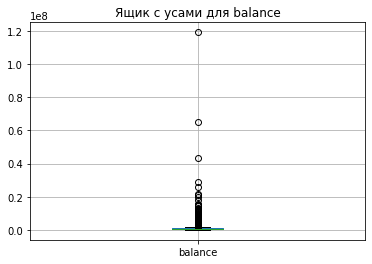

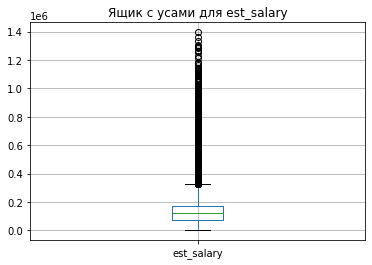

In [23]:
#построим ящик с усами для столбцов balance и est_salary

df2.boxplot(column='balance')
plt.title('Ящик с усами для balance')
plt.show()

df2.boxplot(column='est_salary')
plt.title('Ящик с усами для est_salary')
plt.show()

Клиенты у которых на балансе более 5 млн. рублей являются выбросами и могут сильно "испортить" портрет клиента банка, который нам необходимо предоставить отделу маркетинга. По этому посмотрим какое количество клиентов есть во фрейме с балансом более 5 млн. рублей.

In [24]:
print(f'Количество клиентов с балансом от 5 млн. составляет {len(df2.query("balance >= 5000000"))} человек')

Количество клиентов с балансом от 5 млн. составляет 70 человек


70 человек с балансом более чем в 5 млн. рублей мы можем убрать со фрейма.
Теперь проверим какое количество клиентов имеют доход менее чем МРОТ, на 2022 для Ярославской области он составляет 13 890 руб.

In [25]:
print(f'Количество клиентов с доходом ниже МРОТ составляет {len(df2.query("est_salary <13890"))} человек')

Количество клиентов с доходом ниже МРОТ составляет 45 человек


In [26]:
#посмотрим подробнее на данных клиентов и отсортируем их в порядке увеличения возраста
df2.query("est_salary <13890").sort_values(by='age')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
1753,161271,836.00,Ярославль,Ж,19,4,"7,703.05",4,1,1,"5,043.14",0,1,0,0,0,1
9595,183128,799.00,Ростов,Ж,19,6,"17,202.68",1,1,0,"13,550.37",0,1,0,1,0,0
6792,218787,764.00,Рыбинск,М,20,4,"9,040.68",2,1,1,"10,299.63",0,0,1,0,1,0
9744,178968,820.00,Ярославль,М,21,4,"26,361.03",1,1,1,"13,459.43",0,0,1,0,0,1
7421,180078,802.00,Рыбинск,Ж,21,0,"10,105.01",1,1,1,"10,915.12",0,1,0,0,1,0
1696,223958,855.00,Рыбинск,Ж,23,2,"51,051.41",2,1,1,"13,884.68",0,1,0,0,1,0
1988,160979,788.00,Рыбинск,М,24,4,"118,438.82",2,1,0,"8,401.97",0,0,1,0,1,0
8129,95627,831.00,Ростов,М,25,6,"208,738.82",4,1,1,"12,945.28",0,0,1,1,0,0
5350,166967,856.00,Ростов,М,25,7,"256,923.38",4,1,1,"13,616.26",0,0,1,1,0,0
3689,219561,817.00,Ростов,М,25,3,"121,065.39",4,1,1,"7,522.14",0,0,1,1,0,0


Доход клиентов возрастом до 23 лет мы оставим как есть, т.к. это может быть стипендия, а клиенты старше 23 лет, а также пенсионеры не могут получать официально заработную плату или пенсию ниже прожиточного минимума. По этом заменим в столбце `est_salary` данные по вышеуказанным условиям.

In [27]:
#перезапишем данные
df2.loc[(df2['est_salary'] < 13890) & (df2['age'] > 23), 'est_salary'] = 13890

In [28]:
#теперь удалим клиентов, у которых баланс более 5 млн.
#т.к в столбце есть пропуски создадим список клиентов, которых необходимо удалить

rich_people = df2.query('balance >= 5000000')
rich_list = rich_people['balance'].tolist()

#проверяем их количество
len(rich_list)

70

In [29]:
#перезаписываем фрейм
df3 = df2.query('balance not in @rich_list')

In [30]:
print(f'Осталось количество строк во фрейме: {len(df3)}')
print(f'Общая потеря данных: {round((1 - len(df3)/10000) *100, 2)} %')

Осталось количество строк во фрейме: 9804
Общая потеря данных: 1.96 %


Мы потеряли всего 1.96% данных от первоначального фрейма, что вполне приемлемо для дальнейшего анализа.

#### Группировка клиентов по признаку оттока


In [31]:
#сгруппируем клиентов по признаку оттока и визуализируем их количество

churn = df3.groupby('churn')['churn'].count()
churn

churn
0    8059
1    1745
Name: churn, dtype: int64

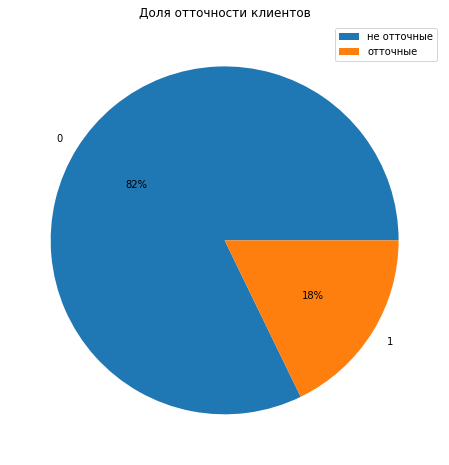

In [32]:
churn.plot(kind='pie', title='Доля отточности клиентов', figsize=(10,8), autopct='%1.0f%%')
plt.legend(['не отточные', 'отточные'])
plt.ylabel('')

plt.show()

In [33]:
#сохраним в переменную уровень оттока для всего датафрейма
churn_per = 0.18

Т.к. было удалено 1.96% данных от первоначального фрейма, процент отточных клиентов сейчас составляет 18% - это очень высокий показатель для любого банка.

Сгруппируем клиентов по признаку оттока и сравним основные показатели, чтобы составить общую картину.

In [34]:
#для столбцов: equity, products, credit_card, last_activity, male, female, rostov, rybinsk, yaroslavl берем значение mean
#для столбцов: score, age, balance, est_salary берем значение median

grouped_by_churn = (df3
                    .groupby('churn')
                    .agg({'score':'median',
                         'age':'median',
                         'equity':'mean',
                         'balance':'median',
                         'products':'mean',
                         'credit_card':'mean',
                         'last_activity':'mean',
                         'est_salary':'median',
                         'female':'mean',
                         'male':'mean',
                         'rostov':'mean',
                         'rybinsk':'mean',
                         'yaroslavl':'mean'})
                    .reset_index()
                   )
grouped_by_churn

,churn,score,age,equity,balance,products,credit_card,last_activity,est_salary,female,male,rostov,rybinsk,yaroslavl
0,0,847.00,40,2.37,"471,831.02",1.76,0.71,0.48,"117,779.14",0.53,0.47,0.14,0.27,0.58
1,1,866.00,39,3.75,"770,568.24",2.37,0.55,0.70,"123,823.34",0.35,0.65,0.15,0.24,0.61


Чтобы видеть разницу в показателях, нам необходимо восспользоваться методомо concat, который позволит сделать вычесления между строками.

In [35]:
#даем понятные названия столбцам и считаем разницу в процентах
pd.concat({'Не отточные': grouped_by_churn.iloc[0],
           'Отточные': grouped_by_churn.iloc[1],
           'Разница %': (grouped_by_churn.iloc[1]/grouped_by_churn.iloc[0]-1)*100}, axis=1)

,Не отточные,Отточные,Разница %
churn,0.00,1.00,inf
score,847.00,866.00,2.24
age,40.00,39.00,-2.50
equity,2.37,3.75,58.14
balance,"471,831.02","770,568.24",63.31
products,1.76,2.37,34.91
credit_card,0.71,0.55,-22.22
last_activity,0.48,0.70,44.18
est_salary,"117,779.14","123,823.34",5.13
female,0.53,0.35,-34.42


Из полученной таблицы мы можем сделать общий вывод: отточные клиенты имеют баланс больше на 63%, имущества - на 58%, продуктов банка  - на 35%, были чаще активны - на 44%, также это чаще мужчины на 44% и кредитных карт у них меньше на 22%.

Между остальными показателями - разница небольшая.

#### Визуализация признаков оттоков клиентов

Чтобы визуализировать признаки отточности клиентов и найти взаимосвязь, мы создадим функцию, которая будет принимать на вход последний датафрейм и строить его по признаку `churn`. 

У нас будет два вида графика: 
1. Для дискретных чисел - гистограмма расспределения countplot
2. Для непрерывных чисел - график плотности kdeplot

In [36]:
def graphs(data, hue=None):
    #для дискретных значений
    for column in ['city','gender', 'credit_card', 'equity','products', 'last_activity']:
        plt.figure(figsize=(10,5))
        ax = sns.countplot(data=data, x=column, hue=hue);
        if column == 'city':
            plt.title(f'Распределение клиентов по городам')
            plt.xlabel(f'Наименование города')
        if column == 'gender':
            plt.title(f'Распределение клиентов по полу')
            plt.xlabel(f'Пол клиента') 
        if column == 'credit_card':
            plt.title(f'Распределение клиентов по наличию кредитной карты')
            plt.xlabel(f'Наличие кредитной карты')            
        if column == 'equity':
            plt.title(f'Распределение клиентов по количеству собственности')
            plt.xlabel(f'Количество собственности')       
        if column == 'products':
            plt.title(f'Распределение клиентов по количеству продуктов банка')
            plt.xlabel(f'Количество продуктов банка')             
        if column == 'last_activity':
            plt.title(f'Распределение клиентов по активности')
            plt.xlabel(f'Активность клиента') 
            
        plt.ylabel('Количество клиентов')
        plt.legend(['не отточные', 'отточные'])
        plt.grid() 
        plt.show()
    
    #для непрерывных значений
    for column in ['score',  'balance', 'est_salary']:
        plt.figure(figsize=(10,5))
        sns.kdeplot(data=data, x=column, hue=hue);
        if column == 'score':
            plt.title(f'Распределение клиентов по кредитному рейтингу')
            plt.xlabel(f'Кредитный рейтинг')          
        if column == 'balance':
            plt.title(f'Распределение клиентов по балансу')
            plt.xlabel(f'Баланс') 
        if column == 'est_salary':
            plt.title(f'Распределение клиентов по доходу')
            plt.xlabel(f'Доход')
            
        plt.ylabel('Количество клиентов')
        plt.legend(['не отточные', 'отточные'])
        plt.grid() 
        plt.show()

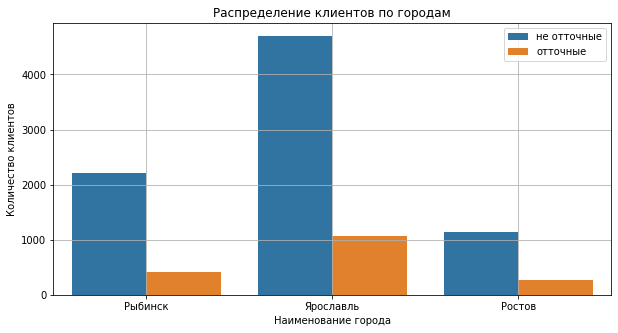

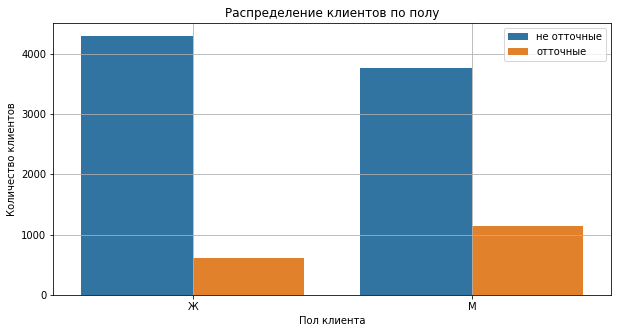

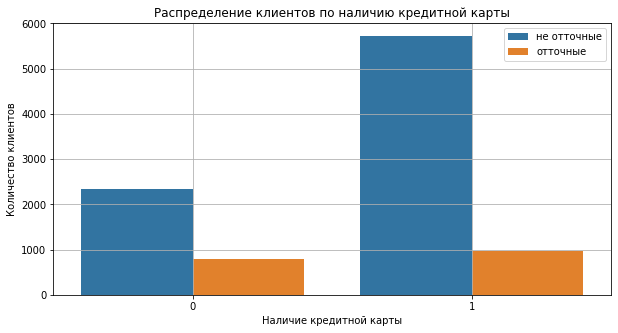

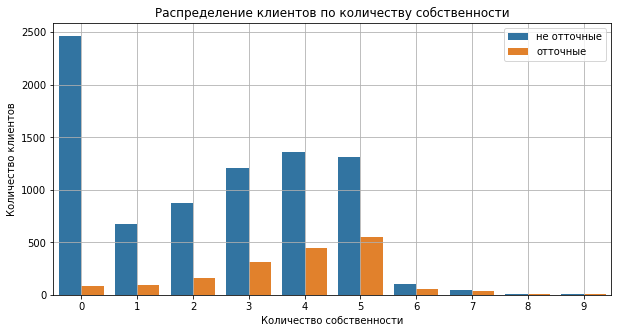

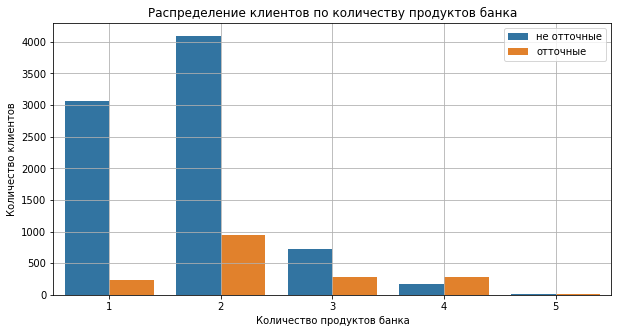

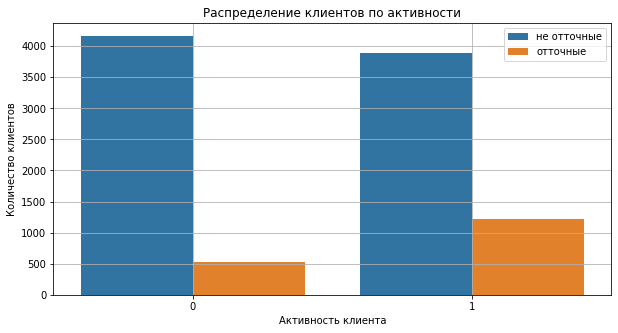

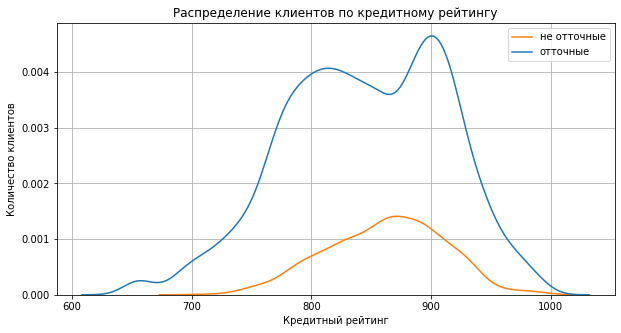

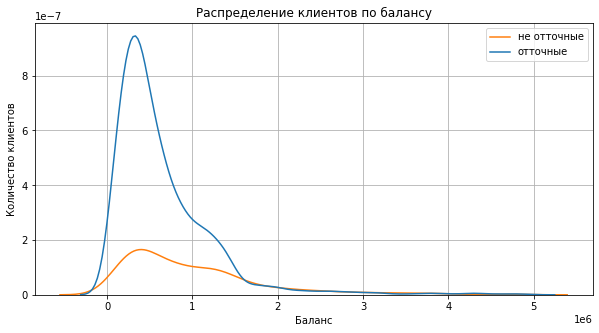

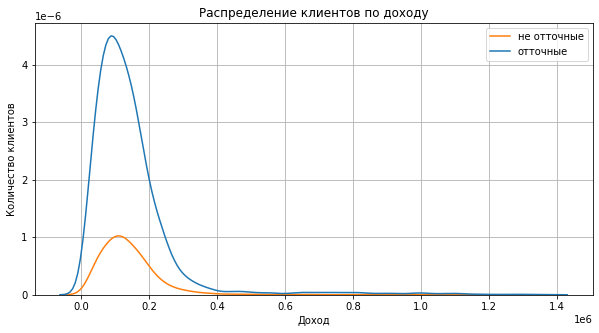

In [37]:
graphs(df3, hue='churn')

Чтобы распределить отточных клиентов по возрасту, нам необходимо их сгруппировать. Для этого построим гистограмму в разрезе оттока и найдем перекрытие графиков.

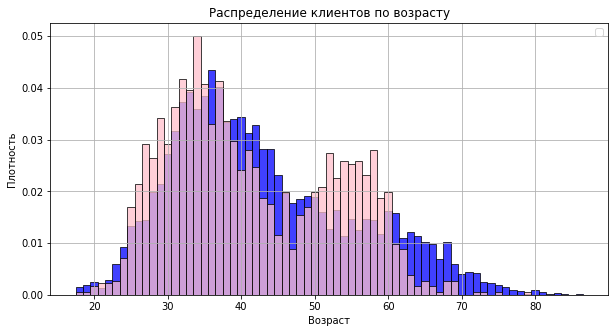

In [38]:
plt.figure(figsize=(10,5))
plt.legend(['Не отточные', 'Отточные'])
sns.histplot(df[df['churn'] == 0]['age'], discrete=True, stat='density', common_norm=False, color='Blue');
sns.histplot(df[df['churn'] == 1]['age'], discrete=True, stat='density', common_norm=False, color='Pink');
plt.title('Распределение клиентов по возрасту')
plt.ylabel('Плотность')
plt.xlabel('Возраст')
plt.grid() 
plt.show()

Можем выделить возрасные категории клиентов:

1. 18-24 
2. 25-36
3. 37-50
4. 51-60
5. 60+

In [39]:
#теперь создадим функцию, которая разобъет столбец age по группам

def age_group(age):
    if 18 <= age <= 24:
        return '18-24'
    if 25 <= age <= 35:
        return '25-35'
    if 36 <= age <= 50:
        return '36-50'
    if 51 <= age <= 60:
        return '51-60'
    if 61 <= age:
        return '60+'

#добавляем столбец во фрейм
df3['age_group'] = df3['age'].apply(age_group)

In [40]:
#группируем клиентов и считаем отточных клиентов
age_group = df3.groupby(['age_group']).agg({'churn': 'sum'})
age_group

,churn
age_group,
18-24,31
25-35,635
36-50,596
51-60,418
60+,65


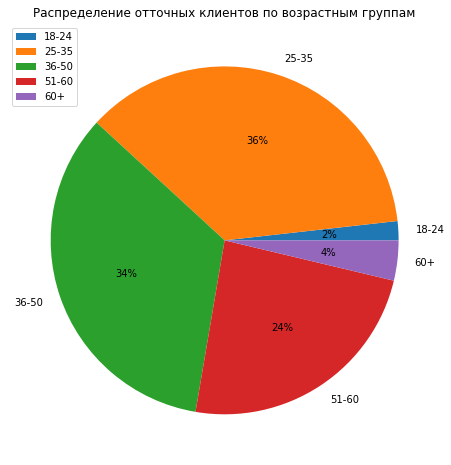

In [41]:
#теперь построим круглую диаграмму для отточных клиентов по возрасным группам
age_group.plot(kind='pie',
               y='churn',
               title='Распределение отточных клиентов по возрастным группам',
               figsize=(10,8),
               autopct='%1.0f%%')
plt.ylabel('')
plt.show()

Две группы явно выделяются - это клиенты возрастом 25-36 лет (40%) и 36-50 лет (31%)

Построим круглые диаграммы для признаков: city, gender, credit_card, чтобы увидеть долю отточных клиентов

In [42]:
#группируем клиентов по городам и признаку отточности
rostov = df3.groupby('churn').agg({'rostov': 'sum'})
rybinsk = df3.groupby('churn').agg({'rybinsk': 'sum'})
yaroslavl = df3.groupby('churn').agg({'yaroslavl': 'sum'})

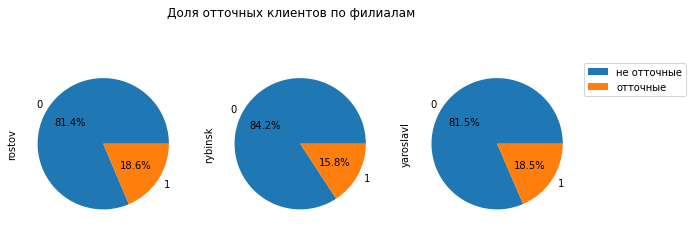

In [43]:
#строим круговые диаграммы на одном графике
figure, axis = plt.subplots(1,3, figsize=(10, 4))
figure.suptitle("Доля отточных клиентов по филиалам");

rostov.plot(ax=axis[0],kind='pie',y='rostov',autopct='%0.1f%%',legend=False);
rybinsk.plot(ax=axis[1],kind='pie',y='rybinsk',autopct='%0.1f%%',legend=False);
yaroslavl.plot(ax=axis[2],kind='pie',y='yaroslavl',autopct='%0.1f%%',legend=False);
axis[2].legend(['не отточные','отточные'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

Меньше всего отточных клиентов в филиале города Рыбинск, на 3% меньше чем в других городах.

In [44]:
#группируем клиентов по полу и признаку отточности
female = df3.groupby('churn').agg({'female': 'sum'})
male = df3.groupby('churn').agg({'male': 'sum'})

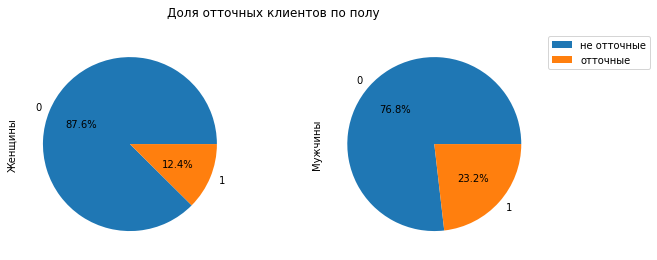

In [45]:
#строим круговые диаграммы на одном графике
figure, axis = plt.subplots(1,2, figsize=(10, 4))
figure.suptitle("Доля отточных клиентов по полу");

female.plot(ax=axis[0],kind='pie',y='female',autopct='%0.1f%%',legend=False);
male.plot(ax=axis[1],kind='pie',y='male',autopct='%0.1f%%',legend=False);
axis[1].legend(['не отточные','отточные'], bbox_to_anchor=(1, 1.02), loc='upper left')
axis[0].set(ylabel='Женщины')
axis[1].set(ylabel='Мужчины')
plt.show()

Отточных клиентов мужчин на 11% больше чем женщин.

In [46]:
#группируем таблицу по наличию кредитной карты и считаем для нее среднее количество отточных клиентов
credit_cards = (df3
                .groupby('credit_card')
                .agg({'churn':'mean'})['churn']
               )
credit_cards 

credit_card
0   0.25
1   0.14
Name: churn, dtype: float64

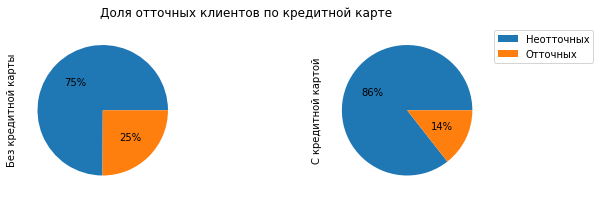

In [47]:
#строим круговые диаграммы на одном графике
figure, axis = plt.subplots(1,2, figsize=(10, 3))
figure.suptitle("Доля отточных клиентов по кредитной карте");

#т.к. у нас в таблице есть только данные для отточных клиентов, чтобы получить долю не отточных,
#необходимо отнять от еденицы полеченное значение
axis[0].pie(x=[1 - credit_cards.loc[0],credit_cards.loc[0]],autopct='%.0f%%')
axis[1].pie(x=[1 - credit_cards.loc[1],credit_cards.loc[1]],autopct='%.0f%%')
axis[1].legend(['Неотточных','Отточных'], bbox_to_anchor=(1, 1.02), loc='upper left')
axis[0].set(ylabel='Без кредитной карты')
axis[1].set(ylabel='С кредитной картой')
plt.show()

Доля отточных клиентов без кредитной карты больше на 9%.

#### Расчет корреляции между признаками отточности

Построим матрицу корреляции, чтобы сразу увидеть визуально наличие зависимости между признаками.

In [48]:
df3.corrwith(df3['churn']).sort_values(key=abs)

rostov           0.01
est_salary      -0.01
user_id         -0.01
yaroslavl        0.02
rybinsk         -0.03
age             -0.05
score            0.10
credit_card     -0.13
female          -0.14
male             0.14
last_activity    0.16
balance          0.22
equity           0.27
products         0.30
churn            1.00
dtype: float64

Самое высокое значение в корреляции составляет 0.3 между оттоком и количеством продуктов банкаю. Значение небольшое, по этому можем сделать вывод, что признаки между собой не коррелируют.

_**Промежуточный вывод:**_

_1. Мы изучили аномалии и выбросы и удалили из фрейма 70 клиентов, баланс которых составляет более 5 млн.рублей. Также заменили значения в столбце `est_salary` для клиентов у которых доход ниже МРОТ и возраст выше 23 лет на значение МРОТа. Нашли одного клиента с нулевых продуктом и исправили значение на минимальное_

_2. Из полученных графиков можем составить портрет отточных клиентов: мужчины в возрасте 25-36 лет, либо 37-50 лет; у которых имеется в собственности 4-5 объектов; пользуются двумя или более продуктами банка; кредитными картами практически не пользуются._

_3. Также на графиках видно, что кредитный рейтинг, баланс на карте и доход не влияют на решение клиента уйти из банка._

_4. Из полученной матрицы, мы сделали вывод, что корреляции между признаками нет._

_5. Наибольшее количество отточных клиентов в городе Ростов_

### Шаг №4: Проверка статистических гипотез

#### Гипотеза №1: о различии дохода между теми клиентами, которые ушли и которые остались

**H_0**: доходы оставшихся и отточных клиентов равны;

**H_1**: доходы оставшихся и отточных клиентов не равны.

Для проверки гипотезы мы можем использовать t-test, который должен соответствовать условиям: 

1. Генеральные совокупности не зависят друг от друга.
2. Выборочные средние нормально распределены.
3. Дисперсии рассматриваемых генеральных совокупностей равны.

In [49]:
#создадим две выборки
a = df3.query('churn == 0')['est_salary']
b = df3.query('churn == 1')['est_salary']

In [50]:
#проверяем соотвествие данных о доходах отточных клиентов нормальному распределению

alpha = 0.01 #критический уровень статистической значимости  

shapiro_test_stat, p_value = st.shapiro(a)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  0.0
Распределение не нормально


In [51]:
#проверяем соотвествие данных о доходах не отточных клиентов нормальному распределению

alpha = 0.01 #критический уровень статистической значимости

shapiro_test_stat, p_value = st.shapiro(b)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение') 

p-значение:  0.0
Распределение не нормально


In [52]:
#проверим дисперсии выборок

print(df3.query('churn == 0')['est_salary'].var())
print(df3.query('churn == 0')['est_salary'].var())

18537151633.970875
18537151633.970875


**t-test применять нельзя, т.к. данные распределенны не нормально, а дисперсии выборок не равны. Для проверки гипотезы используем метод U-критерий Манна-Уитни**

In [53]:
#проведем u-test

alpha = 0.01 #критический уровень статистической значимости 

results = st.mannwhitneyu(a, b)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  0.002507161364894741
Отвергаем нулевую гипотезу


#### Гипотеза №2: о различии дохода между теми клиентами, у которых один продукт и у которых два продукта

**H_0**: доходы клиентов, у которых один и два продукта равны;

**H_1**: доходы клиентов, у которых один и два продукта не равны;

Аналогично проверяем данные на соответствие условий для проведений t-test

In [54]:
c = df3.query('products == 1')['est_salary']
d = df3.query('products == 2')['est_salary']

In [55]:
#проверяем соотвествие данных о доходах клиентов с 1 продуктом нормальному распределению

alpha = 0.01 #критический уровень статистической значимости  

shapiro_test_stat, p_value = st.shapiro(c)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  0.0
Распределение не нормально


In [56]:
#проверяем соотвествие данных о доходах клиентов с 2 продуктами нормальному распределению

alpha = 0.01 #критический уровень статистической значимости  

shapiro_test_stat, p_value = st.shapiro(d)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  0.0
Распределение не нормально


In [57]:
#проверим дисперсии выборок

print(df3.query('products == 1')['est_salary'].var())
print(df3.query('products == 2')['est_salary'].var())

27355473408.232277
10593226540.561823


**t-test применять нельзя, т.к. данные распределенны не нормально, а дисперсии выборок не равны. Для проверки гипотезы используем метод U-критерий Манна-Уитни**

In [58]:
#проведем u-test

alpha = 0.01 #критический уровень статистической значимости 

results = st.mannwhitneyu(c, d)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  2.6105464351929924e-81
Отвергаем нулевую гипотезу


#### Гипотеза №3: о различии дохода между теми клиентами, которые живут в больших и в маленьких городах

**H_0**: доходы клиентов, которые живут в больших и маленьких городах равны;

**H_1**: доходы клиентов, которые живут в больших и маленьких городах не равны;

Создадим две выборки: 1) Клиенты в филиале с наибольшим количеством жителей в городе - Ярославль, 2) Клиенты в филиале с наименьшим количеством жителей в городе - Ростов. Проверяем соответствие данных для проведения t-test

In [59]:
e = df3.query('city == "Ярославль"')['est_salary']
f = df3.query('city == "Ростов"')['est_salary']

In [60]:
#проверяем соотвествие данных о доходах клиентов в городе Ярославль нормальному распределению

alpha = 0.01 #критический уровень статистической значимости  

shapiro_test_stat, p_value = st.shapiro(e)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение') 

p-значение:  0.0
Распределение не нормально


In [61]:
#проверяем соотвествие данных о доходах клиентов в городе Ростов нормальному распределению

alpha = 0.01 #критический уровень статистической значимости  

shapiro_test_stat, p_value = st.shapiro(f)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  1.2327013794442639e-27
Распределение не нормально


In [62]:
#проверим дисперсии выборок
print(df3.query('city == "Ярославль"')['est_salary'].var())
print(df3.query('city == "Ростов"')['est_salary'].var())

22380578383.619205
4523168733.321616


**t-test применять нельзя, т.к. данные распределенны не нормально, а дисперсии выборок не равны. Для проверки гипотезы используем метод U-критерий Манна-Уитни**

In [63]:
#проведем u-test

alpha = 0.01 #критический уровень статистической значимости 

results = st.mannwhitneyu(c, d)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  2.6105464351929924e-81
Отвергаем нулевую гипотезу


_**Промежуточный вывод:**_

_Все нулевые гипотезы были отвергнуты, по этому мы можем сделать заключение, что **доходы клиентов**, которые ушли и остались, имеют один или два продукта, живут в большом или маленьком городе, **НЕ равны**_

### Шаг №5: Сегментизация клиентов

Для сегментизации клиентов используем метод K-Means, который разделит их на кластеры.

In [64]:
#подготовим датафрейм, уберем из него категориальные значения и оставим столбцы только с чистовыми значениями
df_clast = df3.drop(['user_id', 'city', 'gender', 'balance', 'age_group'], axis=1)
df_clast.head()

,score,age,equity,products,credit_card,last_activity,est_salary,churn,female,male,rostov,rybinsk,yaroslavl
0,850.00,25,1,2,0,1,"75,719.14",1,1,0,0,1,0
1,861.00,37,5,3,1,0,"86,621.77",0,1,0,0,1,0
2,892.00,30,0,1,1,1,"107,683.34",0,1,0,0,1,0
3,866.00,51,5,2,0,1,"174,423.53",1,1,0,0,0,1
4,730.00,34,5,1,1,0,"67,353.16",1,0,1,0,0,1


In [65]:
#выполняем стандартизацию данных
scaler = StandardScaler()
df_std = scaler.fit_transform(df_clast)

In [66]:
#строим матрицу расстояний
linked = linkage(df_std, method = 'ward') 

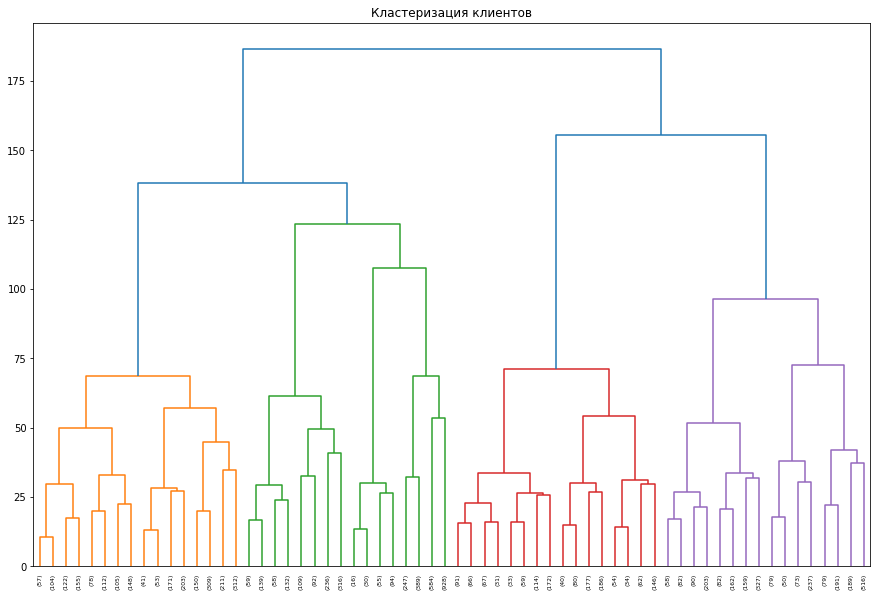

In [67]:
#строим дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top',truncate_mode="level", p=5) 
plt.title('Кластеризация клиентов')
plt.show() 

In [68]:
#задаём модель k_means с числом кластеров 4 и фиксируем значение random_state
kmeans = KMeans(n_clusters = 4, random_state = 0)
#прогнозируем кластеры для наблюдений
labels = kmeans.fit_predict(df_std)

#сохраняем метки кластера в поле нашего датасета
df_clast['Segment K-means'] = labels
#выводим статистику по средним значениям признаков
#display(df_clast.groupby(['Segment K-means']).mean().T.reset_index())

In [69]:
#выводим статистику по медианному значению признаков
#display(df_clast.groupby(['Segment K-means']).median().T.reset_index())

Согласно круговой диаграмме, самые отточные клиенты попадают в возрастную группу 25-50. Посчитаем для них основные метрики, используя два основных признака: equity>=2 и products>=2.

In [70]:
#расчет для возрастной группы 25-35 лет
seg_1 = (df3
         .query('age_group == "25-35" and gender == "М" and equity >=3 and products >=2')
         .agg({'churn':['mean','count'],
              'est_salary':'mean',
              'score':'mean',
              'credit_card':'mean',
              'last_activity':'mean'})
               )
print(seg_1)

print('*' *60)

seg_2 = (df3
         .query('age_group == "25-35" and gender == "Ж" and equity >=3 and products >=2')
         .agg({'churn':['mean','count'],
              'est_salary':'mean',
              'score':'mean',
              'credit_card':'mean',
              'last_activity':'mean'})
               )
print(seg_2)

       churn  est_salary  score  credit_card  last_activity
mean    0.41  115,627.24 856.23         0.66           0.55
count 766.00         NaN    NaN          NaN            NaN
************************************************************
       churn  est_salary  score  credit_card  last_activity
mean    0.25  101,319.46 853.36         0.54           0.57
count 619.00         NaN    NaN          NaN            NaN


In [71]:
#расчет для возрастной группы 36-50 лет
seg_3 = (df3
         .query('age_group == "36-50" and gender == "М" and equity >=3 and products >=2')
         .agg({'churn':['mean','count'],
              'est_salary':'mean',
              'score':'mean',
              'credit_card':'mean',
              'last_activity':'mean'})
               )
print(seg_3)

print('*' *60)

seg_4 = (df3
         .query('age_group == "36-50" and gender == "Ж" and equity >=3 and products >=2')
         .agg({'churn':['mean','count'],
              'est_salary':'mean',
              'score':'mean',
              'credit_card':'mean',
              'last_activity':'mean'})
               )
print(seg_4)

       churn  est_salary  score  credit_card  last_activity
mean    0.31  162,389.93 848.90         0.64           0.47
count 919.00         NaN    NaN          NaN            NaN
************************************************************
       churn  est_salary  score  credit_card  last_activity
mean    0.16  148,438.88 848.81         0.51           0.52
count 886.00         NaN    NaN          NaN            NaN


In [72]:
#расчет для возрастной группы 51-60 лет
seg_5 = (df3
         .query('age_group == "51-60" and gender == "М" and equity >=3')
         .agg({'churn':['mean','count'],
              'est_salary':'mean',
              'score':'mean',
              'credit_card':'mean',
              'products':'mean',
              'last_activity':'mean'})
               )
print(seg_5)

print('*' *70)

seg_6 = (df3
         .query('age_group == "51-60" and gender == "Ж" and equity >=3')
         .agg({'churn':['mean','count'],
              'est_salary':'mean',
              'score':'mean',
              'credit_card':'mean',
              'products':'mean',
              'last_activity':'mean'})
               )
print(seg_6)

       churn  est_salary  score  credit_card  products  last_activity
mean    0.48  122,705.02 856.66         0.58      2.22           0.51
count 406.00         NaN    NaN          NaN       NaN            NaN
**********************************************************************
       churn  est_salary  score  credit_card  products  last_activity
mean    0.28  104,496.17 847.99         0.50      2.11           0.53
count 487.00         NaN    NaN          NaN       NaN            NaN


Из полученных результатов мы можем выделить три целевых сегмента. Возрасную категорию "51-60" мы учитывать не будем, т.к. выборка получилась небольшая.

**Сегмент 1**: 
- Доля отточности 0.41
- Количество 766
- Мужчина
- С кредитной карты
- Возрастная группа 25-35 лет
- Имеет в собственности 3 или более объекта
- Пользуется минимум 2 продуктами банка
- Средний кредитный рейтинг 856 баллов
- Со средним доходом 115 тыс.
- Активный клиент

**Сегмент 2**:
- Доля отточности 0.31
- Количество 911
- Мужчина
- С кредитной карты
- Возрастная группа 36-50 лет
- Имеет в собственности 3 или более объекта
- Пользуется минимум 2 продуктами банка
- Средний кредитный рейтинг 849 баллов
- Со средним доходом 162 тыс.
- Не активный клиент

**Сегмент 3**:
- Доля отточности 0.25
- Количество 619
- Женщина
- С кредитной карты
- Возрастная группа 25-35 лет
- Имеет в собственности 3 или более объекта
- Пользуется минимум 2 продуктами банка
- Средний кредитный рейтинг 853 баллов
- Со средним доходом 101 тыс.
- Активный клиент

### Шаг №6: Выводы и рекомендации

1. При ознакомлении с датафреймом, мы увидели, что нам предоставленны данные о 10 000 пользователях. Столбцов 12, как было заявлено в ТЗ. В столбце `age` выявлены и удалены пропуски - менее 1% от общего объема датафрейма. Заказчику необходимо обратить внимание на пропуски в столбце `balance`, которые составляют - **23%**. Мы видим, что есть связь пропусков с такими признаками как: `est_salary`, `churn`, `equity`. Значит это не связано с технической ошибкой при сборе\выгрузке данных, больше всего пропусков допущено в городе Ярославль.
2. В процессе предобработки данных были выполнены следующие шаги:
    - Наименования столбцов были приведены к змеиному типу
    - Данные столбца `age` приведены к типу integer
    - Было найдено 50 неявных дубликатов в столбце `user_id`, которые были удалены со фрейма, т.к. информация о клиенте протеворечила друг другу по всем показателям
    - Общая потеря данных в итоговом датасете составляет **1.26%**
    - Было выявлено, что пропуски в столбце `balance` не являются признаком отточности клиентов
    - Выполнено кодирование категориальных данных для дальнейшего исследовательского анализа
3. В ходе исследовательского анализа, были выполнены следующие пункты:
    - После изучения аномалий и выбросов, было удалено из фрейма 70 клиентов, баланс которых составляет более 5 млн.рублей. Заказчику необходимо обратить внимание на сбор данных по дохоуд `est_salary`, т.к. были выявлены клиенты у которых доход ниже МРОТ. Мы изучили данные, и приняли решение заменить значения дохода для клиентов, возрастом старше 23 лет, на значение МРОТа. Нашли одного клиента с нулевых продуктом и исправили значение на минимальное
    - Из полученных графиков мы составили общий портрет отточных клиентов: _мужчины в возрасте 25-36 лет, либо 37-50 лет; у которых имеется в собственности 4-5 объектов; пользуются двумя или более продуктами банка; кредитными картами практически не пользуются_
    - На графиках видно, что кредитный рейтинг, баланс на карте и доход не влияют на решение клиента уйти из банка
    - Из полученной тепловой карты, мы сделали вывод, что корреляции между признаками датафрейма нет
    - Наибольшее количество отточных клиентов в городе Ростов
4. В результате проверки трёх статистических гипотез было выявлено следующее: **доходы клиентов**, которые ушли и остались, имеют один или два продукта, живут в большом или маленьком городе, **НЕ равны**
5. Была выполнена сегментация клиентов с помощью метода K-means, где были выявлены 4 отточных сегменты, из них мы приоритизировали два наиболее отточных сегмента:
    - **Сегмент 1**: 
      - Доля отточности 0.41
      - Количество 766
      - Мужчина
      - С кредитной карты
      - Возрастная группа 25-35 лет
      - Имеет в собственности 3 или более объекта
      - Пользуется минимум 2 продуктами банка
      - Средний кредитный рейтинг 856 баллов
      - Со средним доходом 115 тыс.
      - Активный клиент

    - **Сегмент 2**:
      - Доля отточности 0.31
      - Количество 911
      - Мужчина
      - С кредитной карты
      - Возрастная группа 36-50 лет
      - Имеет в собственности 3 или более объекта
      - Пользуется минимум 2 продуктами банка
      - Средний кредитный рейтинг 849 баллов
      - Со средним доходом 162 тыс.
      - Не активный клиент

    - **Сегмент 3**:
      - Доля отточности 0.25
      - Количество 619
      - Женщина
      - С кредитной карты
      - Возрастная группа 25-35 лет
      - Имеет в собственности 3 или более объекта
      - Пользуется минимум 2 продуктами банка
      - Средний кредитный рейтинг 853 баллов
      - Со средним доходом 101 тыс.
      - Активный клиент

**Рекомендации Заказчику**: 

Из полученных данных мы видим, что отточными клиентами являются люди в возрастной категории от 25 до 50 лет, являются обеспечеными, с высоким средним доходом (от 100 тыс.). Имееют в собственности несколько объектов, пользуются минимум двумя продуктами банка. Отточными клиентами являются как мужчины, так и женщины с высоким кредитным рейтингом. У половины есть кредитная карта. По этому предлагаю Заказчику обратить внимание на следующие рекомендации и предложить целевым клиентам:
 - Кредитная карта на выгодных условиях;
 - Страхование имущества от банка, либо у партнеров со скидкой;
 - Повышенный процент по вкладам;
 - Программу лояльности для заработных клиентов;
 - Повышенный кешбек: для мужчин - автотовары, отдых, спорт; для женщин - салоны красоты, бытовые товары, здоровье;
 - Предложить семейное обслуживание с дополнительными выгодными акциями.
 
Т.к. доход и баланс клиента не являются признаком оттока, Заказчику необходимо проверить качество работы филиалов: компетентность менеджеров по обслуживанию, скорость реагирования техподдержки на запросы от клиентов, т.к. данные пункты также могут быть причиной отказа клиента от обслуживание и переход к более лояльным конкурентам.